In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Markov Reward Process

### 2-1. Markov Reward Process (Employee Model) 

In [2]:
# employee model
# state transition matrix
# index: 0: home, 1: coffee, 2: chat, 3: computer
idx_to_state = {0: 'Home', 1: 'Coffee', 2: 'Chat', 3: 'Computer'}

P = [[0.6, 0.4, 0.0, 0.0],
     [0.0, 0.1, 0.7, 0.2],
     [0.0, 0.2, 0.5, 0.3],
     [0.2, 0.2, 0.1, 0.5]]

# reward matrix
# immediate reward when transit from state i (row) to state j (column)
R = [[1.0, 1.0, 0.0, 0.0],
     [0.0, 1.0, 2.0, 3.0],
     [0.0, 1.0, -1.0, 2.0],
     [2.0, 1.0, -3.0, 5.0]]

In [3]:
def next_state(s, P):
    '''
    현재 상태 s와 state transition matrix P가 주어질 때,
    다음 상태 s를 반환하는 함수

    input:
    s: 0에서 n-1까지의 값을 가질 수 있는 정수 (상태)
    P: n x n 행렬 (state transtion matrix)

    output:
    next_s: 확률에 의해 결정된 다음 상태
    '''

    n = len(P) # P 행렬의 행의 갯수 (= 상태의 갯수)

    # cumulative sum of the state transition matrix 
    csP = np.cumsum(P, axis=1) # sum along rows
    zero_vec = np.zeros((n, 1)) # a column vector (nx1 matrix) with zero elements
    csP = np.concatenate((zero_vec, csP), axis=1) # concatenate two matrices

    prob = np.random.uniform()
    for k in range(n):
        if (prob >= csP[s][k]) and (prob < csP[s][k+1]):
            next_s = k
            break

    return next_s    

In [4]:
# sampling of Markov reward process (4 states)
list_episodes = []
list_rewards = []
list_return = []

num_episodes = 20
length_episode = 24
gamma = 0.5

for i in range(num_episodes):

    # start of a new episode
    episode = []
    reward = []
    G = 0.0 # initialize return to 0 for each episode
    s = 0 # current state

    for t in range(length_episode):
        next_s = next_state(s, P)
        r = gamma**t * R[s][next_s] # discounted reward at time t
        G += r

        episode.append(next_s)
        reward.append(r)
        s = next_s # 다음 상태를 현재 상태로 업데이트

    list_episodes.append(episode)
    list_rewards.append(reward)
    list_return.append(G)

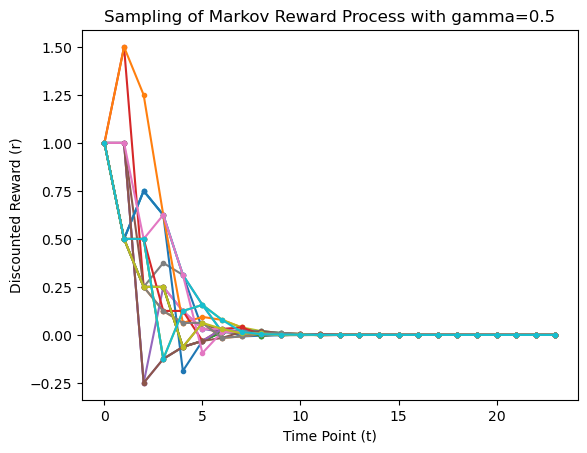

In [5]:
plt.figure()
plt.plot(np.array(list_rewards).T, '.-')
plt.xlabel('Time Point (t)')
plt.ylabel('Discounted Reward (r)')
plt.title(f'Sampling of Markov Reward Process with gamma={gamma}')
plt.show()

In [6]:
list_return

[3.242747187614441,
 2.1559234857559204,
 1.8316608667373657,
 2.9571666717529297,
 2.1865453720092773,
 2.5362014770507812,
 2.2287157773971558,
 2.622024416923523,
 2.3111897706985474,
 3.4142507314682007,
 2.698562741279602,
 4.485121250152588,
 1.9389822483062744,
 2.3077802658081055,
 1.5873513221740723,
 1.5675544738769531,
 3.382173180580139,
 1.9998103380203247,
 2.0462619066238403,
 2.2578095197677612]

In [7]:
def get_returns(init_s, P, R, gamma, n_episodes=2000, len_episode=100):
    '''
    a function to calculate returns with sampling in MRP
    (input arguments)
    init_s: initial state (from which a value is calculated)
    P: state transition matrix
    R: reward matrix
    gamma: discounting factor
    n_episodes: number of episodes to sample
    len_episode: length (time steps) of a single episode 

    (output)
    list_return: a list of returns from all episodes
    '''

    list_return = []

    for i in range(n_episodes):
        # start of a new episode
        s = init_s
        G = 0.0 # initialize return to 0 for each episode
        
        for t in range(len_episode):
            next_s = next_state(s, P)
            r = gamma**t * R[s][next_s] # discounted reward at time t
            G += r
            s = next_s # 다음 상태를 현재 상태로 업데이트

        list_return.append(G)

    return list_return

In [8]:
list_returns = []
gamma = 0.5
for s in range(4):
    returns = get_returns(s, P, R, gamma, n_episodes=20000, len_episode=50)
    list_returns.append(returns)

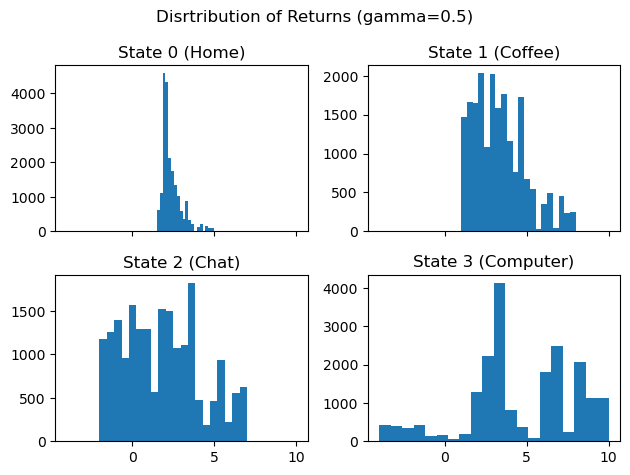

In [9]:
fig, ax = plt.subplots(2, 2, sharex=True)
n_bins = 20
ax[0][0].hist(list_returns[0], bins=n_bins)
ax[0][1].hist(list_returns[1], bins=n_bins)
ax[1][0].hist(list_returns[2], bins=n_bins)
ax[1][1].hist(list_returns[3], bins=n_bins)
ax[0][0].set_title(f'State 0 ({idx_to_state[0]})')
ax[0][1].set_title(f'State 1 ({idx_to_state[1]})')
ax[1][0].set_title(f'State 2 ({idx_to_state[2]})')
ax[1][1].set_title(f'State 3 ({idx_to_state[3]})')
plt.suptitle(f'Disrtribution of Returns (gamma={gamma})')
plt.tight_layout()
plt.show()

In [10]:
print(f'gamma = {gamma}')
array_V = np.zeros(4)
for s in range(4):
    array_V[s] = np.mean(list_returns[s])
    print(f'Value of a state {s}: {idx_to_state[s]} = {array_V[s]:.3f}')

gamma = 0.5
Value of a state 0: Home = 2.386
Value of a state 1: Coffee = 3.361
Value of a state 2: Chat = 1.765
Value of a state 3: Computer = 4.589


In [11]:
gamma = 0.0
list_returns = []
for s in range(4):
    returns = get_returns(s, P, R, gamma=0.0)
    list_returns.append(returns)

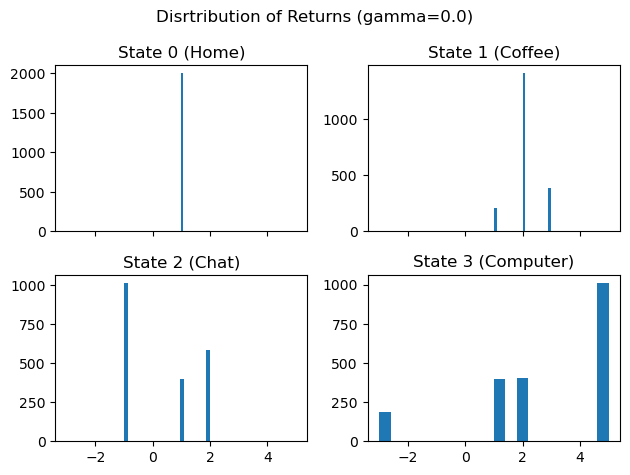

In [12]:
fig, ax = plt.subplots(2, 2, sharex=True)
ax[0][0].hist(list_returns[0], bins=20)
ax[0][1].hist(list_returns[1], bins=20)
ax[1][0].hist(list_returns[2], bins=20)
ax[1][1].hist(list_returns[3], bins=20)
ax[0][0].set_title(f'State 0 ({idx_to_state[0]})')
ax[0][1].set_title(f'State 1 ({idx_to_state[1]})')
ax[1][0].set_title(f'State 2 ({idx_to_state[2]})')
ax[1][1].set_title(f'State 3 ({idx_to_state[3]})')
plt.suptitle(f'Disrtribution of Returns (gamma={gamma})')
plt.tight_layout()
plt.show()

In [13]:
print(f'gamma = {gamma}')
array_R = np.zeros(4)
for s in range(4):
    array_R[s] = np.mean(list_returns[s])
    print(f'Value of a state {s}: {idx_to_state[s]} = {array_R[s]:.3f}')

gamma = 0.0
Value of a state 0: Home = 1.000
Value of a state 1: Coffee = 2.091
Value of a state 2: Chat = 0.277
Value of a state 3: Computer = 2.844


### 2-2. Bellman equation for MRP

In [14]:
array_R = np.reshape(array_R, (4, 1))
array_R

array([[1.    ],
       [2.0915],
       [0.2765],
       [2.844 ]])

In [15]:
array_V = np.reshape(array_V, (4, 1))
array_V

array([[2.38629094],
       [3.36094029],
       [1.76515074],
       [4.58908892]])

In [16]:
I = np.identity(4)
I

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [17]:
P = np.array(P)
gamma = 0.5
I - gamma * P

array([[ 0.7 , -0.2 ,  0.  ,  0.  ],
       [ 0.  ,  0.95, -0.35, -0.1 ],
       [ 0.  , -0.1 ,  0.75, -0.15],
       [-0.1 , -0.1 , -0.05,  0.75]])

In [18]:
from numpy.linalg import inv

In [19]:
inv(I - gamma * P)

array([[1.43932128, 0.32755441, 0.15787532, 0.07524899],
       [0.03762449, 1.14644043, 0.55256363, 0.26337145],
       [0.04500184, 0.19476208, 1.44522316, 0.31501291],
       [0.19992623, 0.20951678, 0.1910734 , 1.39948359]])

In [20]:
(I - gamma * P) @ inv(I - gamma * P)

array([[ 1.00000000e+00, -1.82791607e-17, -5.83573519e-19,
        -1.53623169e-18],
       [-1.01303756e-17,  1.00000000e+00, -6.00412686e-17,
        -1.88709247e-17],
       [ 3.19148167e-18,  3.93860935e-18,  1.00000000e+00,
         1.88709247e-17],
       [ 6.93889390e-18,  4.16333634e-17,  2.08166817e-17,
         1.00000000e+00]])

In [21]:
inv(I - gamma * P) @ (I - gamma * P)

array([[ 1.00000000e+00, -5.00308072e-17,  2.96283859e-17,
         1.04083409e-17],
       [-4.23756280e-18,  1.00000000e+00,  8.80868394e-17,
         2.77555756e-17],
       [-3.60894150e-19, -7.29978805e-18,  1.00000000e+00,
         1.38777878e-17],
       [ 8.88465087e-18,  8.88465087e-18,  1.83201132e-17,
         1.00000000e+00]])

In [22]:
inv(I - gamma * P) @ array_R

array([[2.38206197],
       [3.33721689],
       [1.74784766],
       [4.67109369]])

In [23]:
array_V

array([[2.38629094],
       [3.36094029],
       [1.76515074],
       [4.58908892]])